<a href="https://colab.research.google.com/github/StalkYy-06/5CS037-2024/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# mounting the drive to import the database

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [64]:
# importing necessary python package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
### Exercises:

### 1. Data Exploration and Understanding:

 • Dataset Overview:

1. Load the dataset and display the first 10 rows.

In [65]:
# loding provided dataset
df=pd.read_csv('/content/gdrive/My Drive/WHR-2024-5CS037.csv')

# displaying the first 10 rows
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.

In [66]:
# displaying the rows and colums in the dataset

df.shape # displays in the format of "(rows,columns)"

(143, 9)

3. List all the columns and their data types.

In [67]:
# using dtypes to print all the data and their datatypes

df.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


• Basic Statistics:

1. Calculate the mean, median, and standard deviation for the Score column.

In [68]:
# calculating the mean using the '.mean()' method

mean = df['score'].mean()

# calculating the median using the '.median()' method

median = df['score'].median()

# calculating the Standard Deviation using the '.std()' method

standard_deviation =df['score'].std()

# printing the obtained data respectively

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {standard_deviation}")

Mean: 5.52758041958042
Median: 5.785
Standard Deviation: 1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [69]:
# using '.min()' & '.max()' methods to find the lowest and highest happiness score respectively

highest_score = df['score'].max()
lowest_score = df['score'].min()

#comparing the score highest and lowest score to every row and extracting the name

highest_country = df.loc[df['score'] == highest_score, 'Country name'].values[0]
lowest_country = df.loc[df['score'] == lowest_score, 'Country name'].values[0]

# printing the obtained data

print(f"country with Highest Happiness Score: {highest_country}")
print(f"Country with Lowest Happiness Score: {lowest_country}")

country with Highest Happiness Score: Finland
Country with Lowest Happiness Score: Afghanistan


• Missing Values:

1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [70]:
# displaying the number of missing values in the dataset

df.isnull().sum()

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


• Filtering and Sorting:

1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [71]:
# subsetting the dataset containing countires with score greater than 7.5

higher_score = df[df['score'] > 7.5]

# printing the subset

higher_score

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

In [72]:
# sorting the filtered data in descending order

sorted_higher_score = higher_score.sort_values(by='Log GDP per capita', ascending=False)

# printing the top 10 rows

sorted_higher_score.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


• Adding New Columns:

1. Create a new column called Happiness_Category that categorizes countries into three categories
based on their Score:



In [73]:
# defining the function to categorize happiness

def category(score):
  if score > 6:
    return 'High'
  elif score > 4:
    return 'Medium'
  else:
    return 'Low'

# creating the new column 'Happiness_category' and using the function defined above to fill it

df['Happiness_Category'] = df['score'].apply(category)

# printing the head of the dataframe to check the result

df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

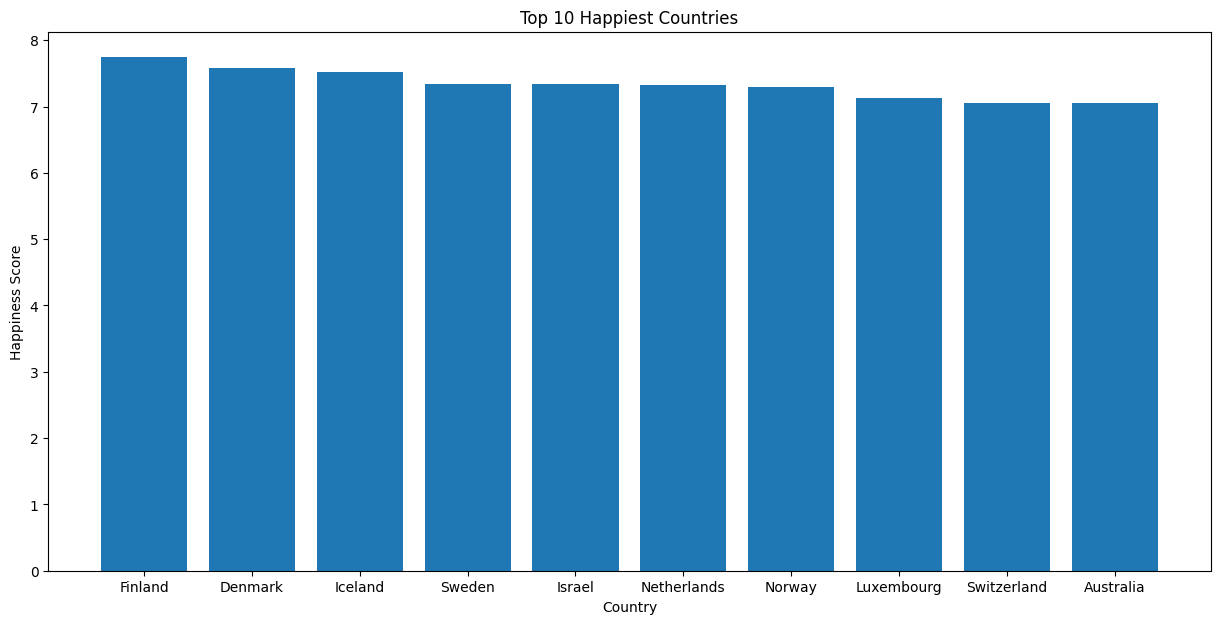

In [74]:
# plotting the bar plot

plt.figure(figsize=(15, 7))
plt.bar(df['Country name'].head(10), df['score'].head(10))

# adding labels and titles to the plot

plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.title('Top 10 Happiest Countries')

#displaying the plot
plt.show()

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

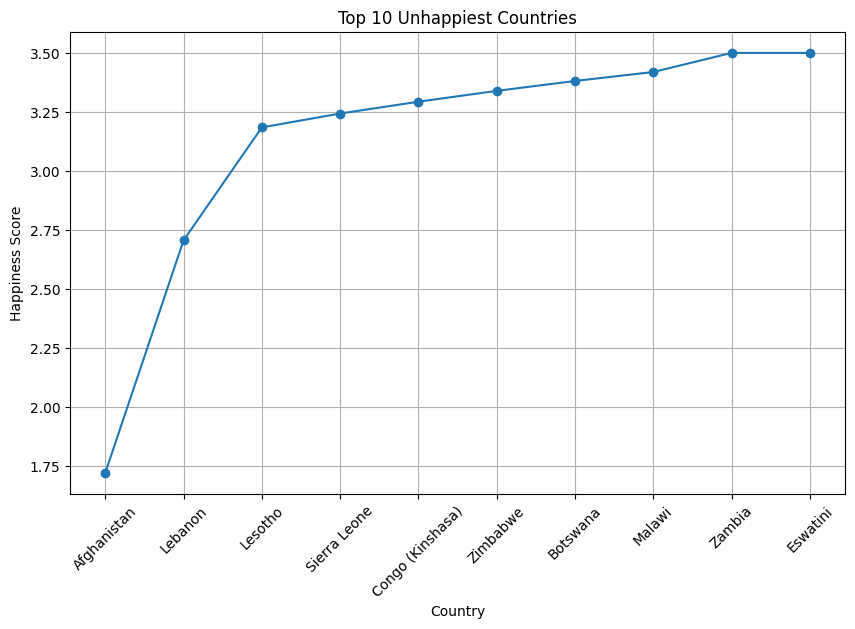

In [75]:
# using 'df.nsmallest()' method to select 10 countries with the lowest score

unhappiest_countries = df.nsmallest(10, 'score')

# plotting the line plot

plt.figure(figsize=(10, 6))
plt.plot(unhappiest_countries['Country name'], unhappiest_countries['score'], marker='o')

# adding labels and titles to the plot

plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.title('Top 10 Unhappiest Countries')

#displaying the plot
plt.xticks(rotation=45)  # Rotating the country names for better visibility
plt.grid()
plt.show()

• Plot a histogram for the Score column to show its distribution and also interpret.

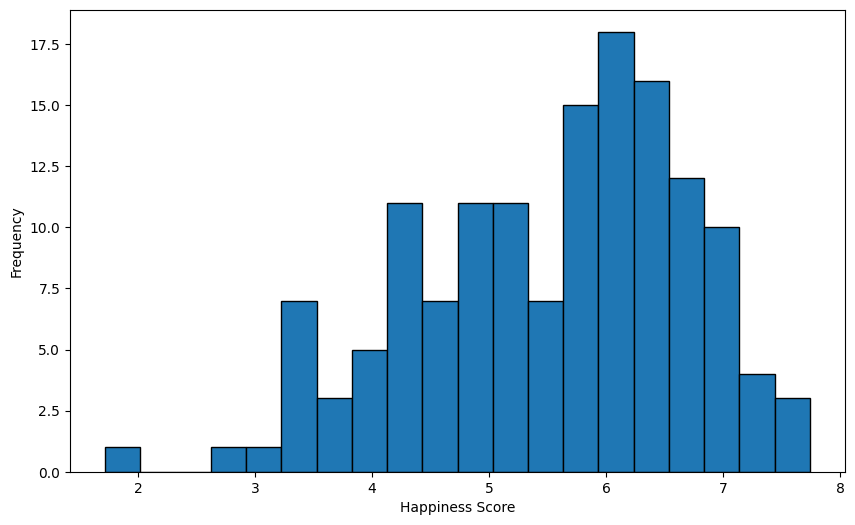

In [76]:
# plotting the histogram for 'Score' column

plt.figure(figsize=(10, 6))
plt.hist(df['score'],edgecolor='black',bins=20)

# adding labels and titles to the plot

plt.xlabel('Happiness Score')
plt.ylabel('Frequency')

#displaying the plot
plt.show()

- Output interpretion :

looking at the above histogram the highest number of score lies at the earlier 6 margin and the frequency decrease at both side of the spectrum from there. The highest happiness score is between 7 and 8 while the lowest is between 0 and 2.

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

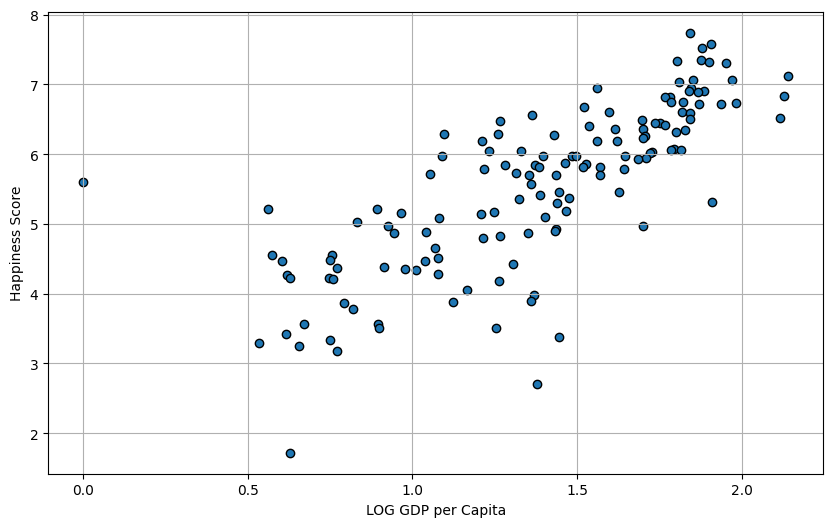

In [77]:
#plotting the scatter plot between GDP per capita and Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['score'],edgecolor='black')

# adding labels and titles to the plot

plt.xlabel('LOG GDP per Capita')
plt.ylabel('Happiness Score')

#displaying the plot
plt.grid()
plt.show()

Analasying the above scatter plot we can see an upward trend between the score and GDP per capita. It suggests that as GDP per Capita increases the happiness score tends to increase. Which means that country with higher GDP per Capita is likely to have higher happiness score.

# 3.2 Problem - 2 - Some Advance Data
## Exploration Task:

### Task - 1 - Setup Task - Preparing the South-Asia Dataset:

Steps:

1. Define the countries in South Asia with a list for example:

south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]

In [78]:
# Defining the countries in South Asia with a list

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [79]:
# using the list to filter out the matching dataset

filtered_dataset = df[df['Country name'].isin(south_asian_countries)]

#printing the dataset

filtered_dataset

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


3. Save the filtered dataframe as separate CSV files for future use.

In [80]:
#saving the filtered dataframe as seperate CSV file

filtered_dataset.to_csv('/content/gdrive/My Drive/South_Asia.csv', index=False) #saving the file w/o index

### Task - 2 - Composite Score Ranking:

Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy

In [81]:
# loding the South_Asia dataFrame

df2 = pd.read_csv('/content/gdrive/My Drive/South_Asia.csv')

#creating the composite score column

df2['Composite Score'] = (0.40 * df2['Log GDP per capita'] + 0.30 * df2['Social support'] + 0.30 * df2['Healthy life expectancy'])

#displaying the head of South_Asia dataFrame to check the code

df2.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774


2. Rank the South Asian countries based on the Composite Score in descending order.

In [82]:
# ranking the south asian countries based on the composite score in descending order

ranked_df = df2.sort_values(by='Composite Score', ascending=False)

# printing the ranked dataframe

ranked_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

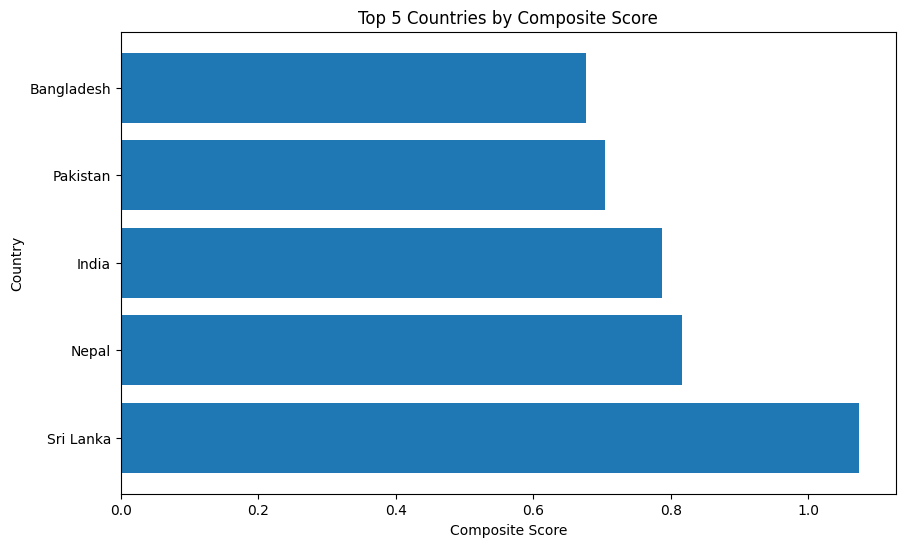

In [83]:
#seperating the top 5 countries
top_5 = ranked_df.head(5)

# plotting the top 5 countries using a horizontal bar chart

plt.figure(figsize=(10, 6))
plt.barh(top_5['Country name'], top_5['Composite Score'])

# adding labels and titles to the plot

plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 Countries by Composite Score')

#displaying the plot
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

- Answer : The rankings based on the composite Score does not align with the rankings based on original score as we can see from the scatter plot below the rankings changed drastically within the countries.

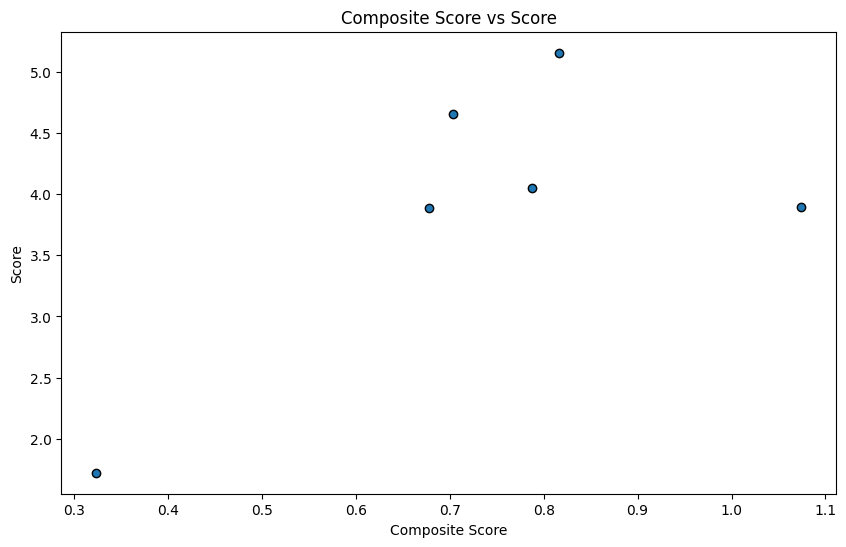

In [84]:
# using scatter plot to visualize
plt.figure(figsize=(10, 6))
plt.scatter(df2['Composite Score'],df2['score'], edgecolor='black')

# adding lables and title
plt.xlabel('Composite Score')
plt.ylabel('Score')
plt.title('Composite Score vs Score')

#displaying the plot
plt.show()

## Task -3- Oulier Detection :

Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [85]:
# defining a function to detectet the outliers

def detect_outliers(df2,column):
  q1 = df2[column].quantile(0.25)
  q3 = df2[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  outliers = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
  return outliers

# using the function to detect the outliers based on score

score_outliers = detect_outliers(df2,'score')

#displaying the outlier based on score

print("Outliers based on Score:")
score_outliers

Outliers based on Score:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score
5,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


In [86]:
# using the function to detect the outliers based on GDP per capita

gdp_outliers = detect_outliers(df2,'Log GDP per capita')

#displaying the outlier based on GDP per capita

print("Outliers based on GDP per Capita:")
gdp_outliers

Outliers based on GDP per Capita:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score
5,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


2. Define outliers using the 1.5 × IQR rule.

- The outliers can be defined by using the '1.5 x IQR rule' by calculating the Q1 which is the 25th percentile and Q3 which is the 75th percentile.Using that we can find the lower bound and upper bound using the formula 'Q1-1.5 x IQR' and 'Q3 + 1.5 x IQR' respectively. Now using that the values that are less than lower bound and greater than upper bound is defined as the Value outliers.

3.Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

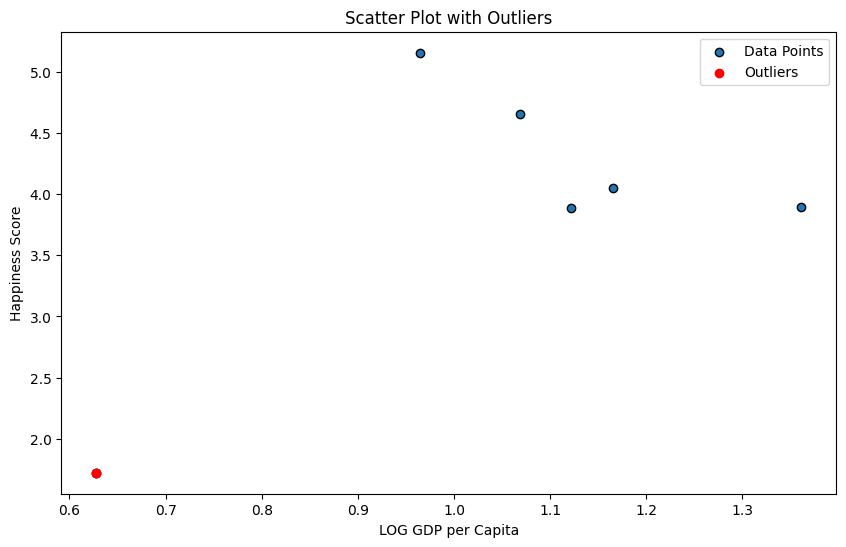

In [87]:
# combining outliers from both columns

outliers = pd.concat([score_outliers,gdp_outliers])

# dropping if any data is duplicate
outliers.drop_duplicates()

#creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['Log GDP per capita'], df2['score'], edgecolor='black', label='Data Points')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')

# adding labels and titles to the plot

plt.xlabel('LOG GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot with Outliers')
plt.legend()

#displaying the plot
plt.show()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

- The outlier is below the lower bound which means its below the 25th percentile. As seen in the scatterplot above we can see that the 'LOG GDP per capita' and 'Happiness Score ' is way below the others which affects the average very negatively by bringing it down by a huge margin.

## Task - 4 - Exploring Trends Across Metrics:

Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.

In [88]:
# calculating Pearsons correlation with Social support

social_corr = df2['score'].corr(df2['Social support'])

# calculating Pearsons correlation with Healthy life expectancy

healthy_corr = df2['score'].corr(df2['Healthy life expectancy'])

#displaying results

print(f"Pearson Correlation between Score and social support : {social_corr}")
print(f"Pearson Correlation between Score and Healthy life expectancy : {healthy_corr}")


Pearson Correlation between Score and social support : 0.6974343971971297
Pearson Correlation between Score and Healthy life expectancy : 0.46154420075686


2. Create scatter plots with trendlines for these metrics against the Score.

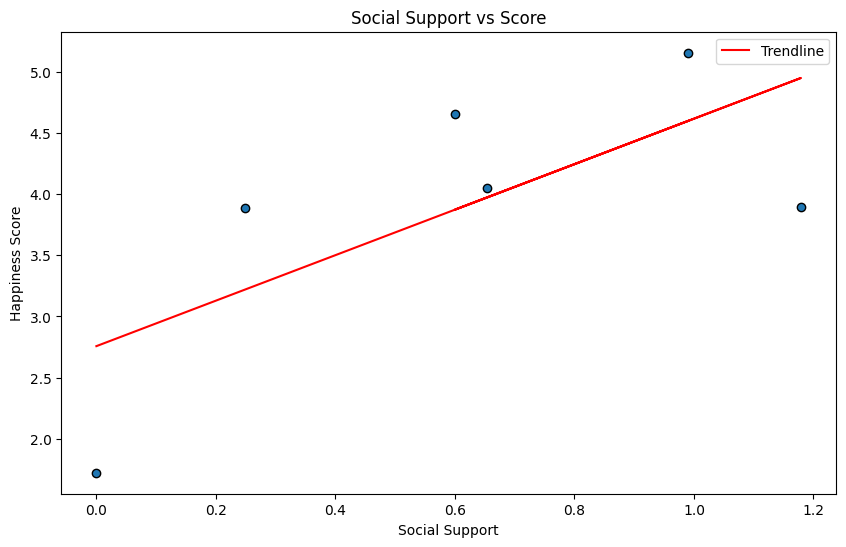

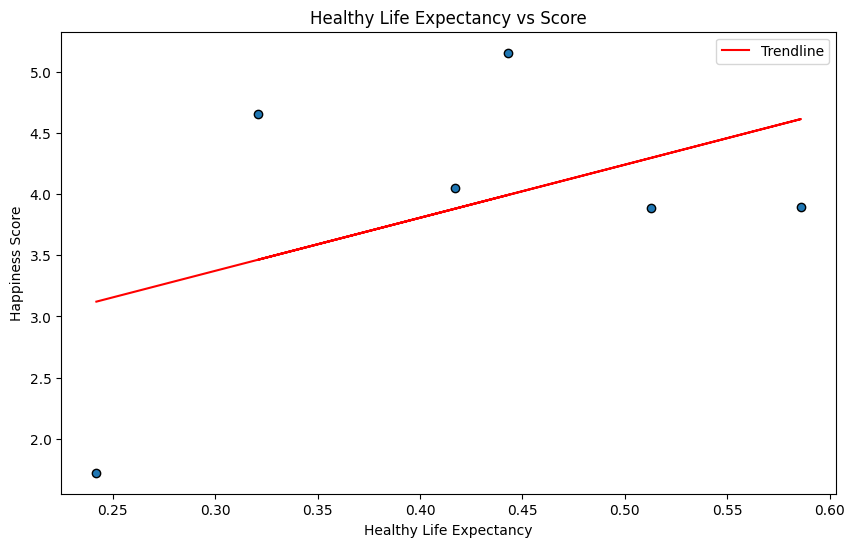

In [89]:
# defining a function to scatter plot with trendline

def trendline(x,y,x_label,y_label,title):
  #createing the scatter plot
  plt.figure(figsize=(10,6))
  plt.scatter(x,y,edgecolor='black')

  #calculating the trendline
  z = np.polyfit(x,y,1) # Degree 1 for linear trendline
  p = np.poly1d(z) # creating a polynomial object
  plt.plot(x,p(x),color='red',label='Trendline')

  #adding labels and titles to the plot
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.legend()

  #displaying the plot
  plt.show()

#using the function for social support vs score
trendline(df2['Social support'],df2['score'],'Social Support','Happiness Score','Social Support vs Score')

#using the function for Healthy life expectancy vs score
trendline(df2['Healthy life expectancy'],df2['score'],'Healthy Life Expectancy','Happiness Score','Healthy Life Expectancy vs Score')

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

- According to the pearson correlation the correlation between healthy life expectancy and happiness score is moderate while the correlation between social support and happiness score is very strong positive relationship.
- The Strong postive relationship suggests that as social support increases the happiness tends to increase significantly

- Where as the moderate relationship represents that the effect of healthy life expectancy on happiness score is lesser than that of social score while not being negligable

## Task - 5 - Gap Analysis:

Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [90]:
# adding a new column named "GDP-Score Gap" which is the difference betwn GDP per capita and the score

df2['GDP-Score Gap'] =  df2['score'] - df2['Log GDP per capita']

#printing the head of the dataframe to check the code

df2.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score,GDP-Score Gap
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,4.193
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,3.588
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,2.888
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,2.537
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,2.764


2. Rank the South Asian countries by this gap in both ascending and descending order.

In [91]:
# ranking in ascending order

ascend = df2.sort_values(by='GDP-Score Gap')

#displying the output

ascend

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score,GDP-Score Gap
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,1.093
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,2.537
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,2.764
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,2.888
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,3.588
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,4.193


In [92]:
# ranking in descending order

descend = df2.sort_values(by='GDP-Score Gap', ascending=False)

#displying the output

descend

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score,GDP-Score Gap
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,4.193
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,3.588
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,2.888
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,2.764
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,2.537
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,1.093


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

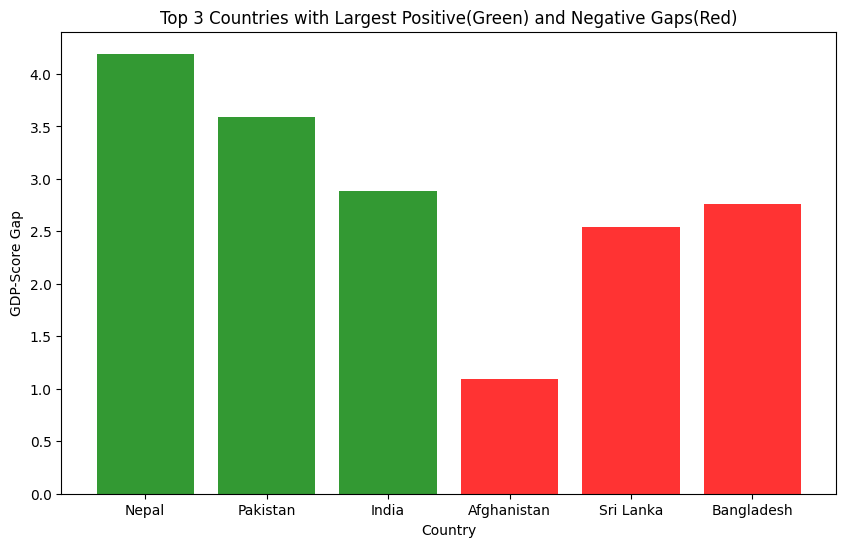

In [93]:
# sorting the data by GDP-Score Gap
top_p = df2.nlargest(3, 'GDP-Score Gap')
top_n = df2.nsmallest(3, 'GDP-Score Gap')

# Combining the top positive and negative gaps into one

combined_top = pd.concat([top_p, top_n])

# plotting the bar chart

plt.figure(figsize=(10, 6))
plt.bar(combined_top['Country name'], combined_top['GDP-Score Gap'],color=['green'] * 3 + ['red'] * 3, alpha=0.8)

# adding labels and titles to the plot

plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.title('Top 3 Countries with Largest Positive(Green) and Negative Gaps(Red)')

#displaying the plot
plt.show()

# 3.3 Problem - 3 - Comparative Analysis:

## Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:

In [94]:
# creating a list for middle eastern countries

middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]

#filtering the original datset for middle eastern countries

filtered_dataset_2 = df[df['Country name'].isin(middle_east_countries)]

#printing the dataset

filtered_dataset_2

#saving the filtered dataframe as seperate CSV file

filtered_dataset_2.to_csv('/content/gdrive/My Drive/middle_east.csv', index=False) #saving the file w/o index

#loading the dataframe as df3

df3 = pd.read_csv('/content/gdrive/My Drive/middle_east.csv')

#printing the head of the dataframe

df3.head()


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
0,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
1,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
2,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
3,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
4,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium


Complete the following task:
1. Descriptive Statistics:

  • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

In [95]:
# adding a 'region' colum to differentiate between south asia and middle eastern countries

df2['region'] = 'South Asia'
df3['region'] = 'Middle East'

#combining the two dataframes into one for easiness
df_combined = pd.concat([df2,df3])

#group by 'Region' and calculate mean and standard deviation
stats = df_combined.groupby('region')['score'].agg(['mean', 'std'])

#printing the output
print(stats)

                 mean       std
region                         
Middle East  5.412100  1.566201
South Asia   3.895667  1.177069


• Which region has higher happiness Scores on average?

- The region with higher happines score is middle east with an mean of 5.412100

2. Top and Bottom Performers:

  • Identify the top 3 and bottom 3 countries in each region based on the score.

In [96]:
# Top 3 countries based on score for south asia
top_3_sa = df_combined[df_combined['region'] == 'South Asia'].nlargest(3, 'score')

# Top 3 countries based on score for middle east
top_3_me = df_combined[df_combined['region'] == 'Middle East'].nlargest(3, 'score')

# bottom 3 countries based on score for south asia
bot_3_sa = df_combined[df_combined['region'] == 'South Asia'].nsmallest(3, 'score')

# Bottom 3 countries based on score for middle east
bot_3_me = df_combined[df_combined['region'] == 'Middle East'].nsmallest(3, 'score')

#Displaying the results
print("Top 3 countries in South Asia based on score:")
print(top_3_sa[['Country name','score']])

print("\nTop 3 countries in Middle East based on score:")
print(top_3_me[['Country name','score']])

print("\nBottom 3 countries in South Asia based on score:")
print(bot_3_sa[['Country name','score']])

print("\nBottom 3 countries in Middle East based on score:")
print(bot_3_me[['Country name','score']])

Top 3 countries in South Asia based on score:
  Country name  score
0        Nepal  5.158
1     Pakistan  4.657
2        India  4.054

Top 3 countries in Middle East based on score:
           Country name  score
0                Israel  7.341
1                Kuwait  6.951
2  United Arab Emirates  6.733

Bottom 3 countries in South Asia based on score:
  Country name  score
5  Afghanistan  1.721
4   Bangladesh  3.886
3    Sri Lanka  3.898

Bottom 3 countries in Middle East based on score:
  Country name  score
9      Lebanon  2.707
8        Yemen  3.561
7       Jordan  4.186


• Plot bar charts comparing these charts.

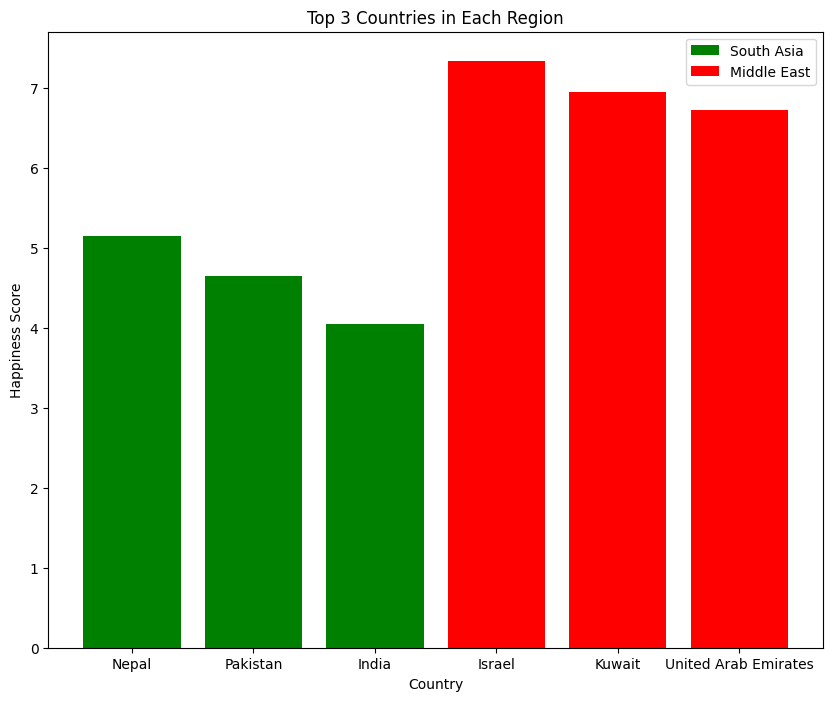

In [97]:
# plotting top 3 countries in each region

plt.figure(figsize=(10, 8))
plt.bar(top_3_sa['Country name'], top_3_sa['score'],color='green', label='South Asia')
plt.bar(top_3_me['Country name'], top_3_me['score'],color='red', label='Middle East')

#labeling the bar graph
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 3 Countries in Each Region')
plt.legend()

#displaying the plot
plt.show()

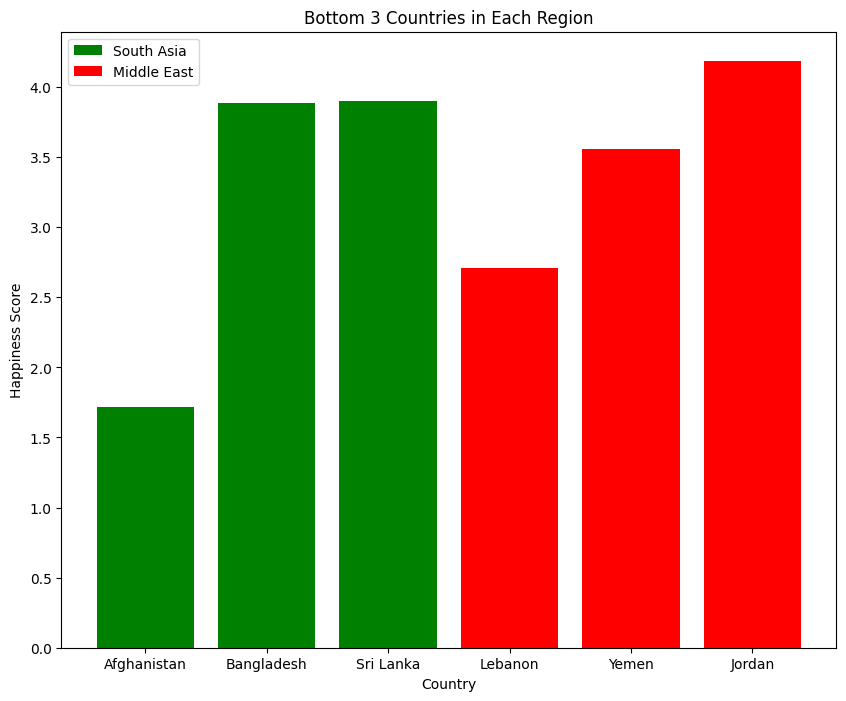

In [98]:
#ploting the bottom 3 countries in each region

plt.figure(figsize=(10, 8))
plt.bar(bot_3_sa['Country name'], bot_3_sa['score'],color='green', label='South Asia')
plt.bar(bot_3_me['Country name'], bot_3_me['score'],color='red', label='Middle East')

#labeling the bar graph

plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Bottom 3 Countries in Each Region')
plt.legend()

#displaying the plot

plt.show()

3. Metric Comparisons:

  • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

<Figure size 1000x600 with 0 Axes>

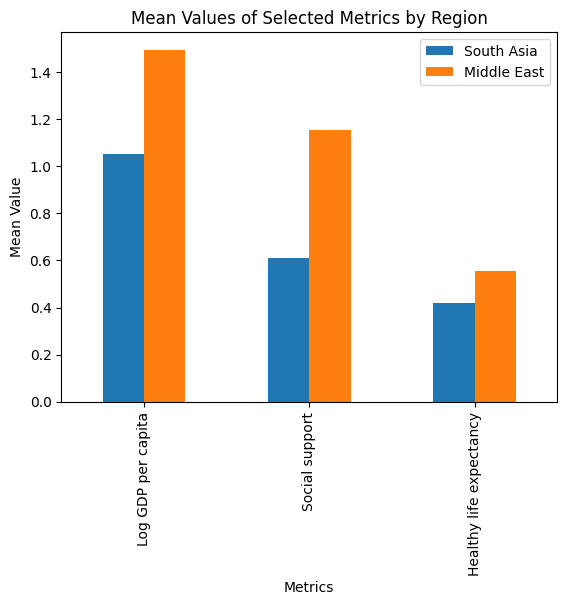

In [99]:
#making a list for all the metrics to be compared
com_list=["Log GDP per capita", "Social support", "Healthy life expectancy"]

#taking mean of the data of both region

sa_mean = df2[com_list].mean()
me_mean = df3[com_list].mean()

#concating the means
concat_df = pd.DataFrame({"South Asia":sa_mean,"Middle East":me_mean})

#plotting the grouped bar chart

plt.figure(figsize=(10, 6))
concat_df.plot(kind='bar')

#labeling the plot
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.title('Mean Values of Selected Metrics by Region')
plt.legend()

#displaying the plot
plt.show()

• Which metrics show the largest disparity between the two regions?

  - As seen from above bar graph we can see that the largest disparity between 2 region is GDP per capita followed by Social support and least disparity in healthy life expectancy.

4. Happiness Disparity:

  • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

In [100]:
# calculationg the range (max - min) for score in both regions

range_sa = df2['score'].max() - df2['score'].min()
range_me = df3['score'].max() - df3['score'].min()

#Calculating the CV for score in both region
cv_sa = df2['score'].std() / df2['score'].mean()
cv_me = df3['score'].std() / df3['score'].mean()

# printing the results

print("Range (max - min) for Score in South Asia:", range_sa)
print("Range (max - min) for Score in Middle East:", range_me)
print("Coefficient of Variation (CV) for Score in South Asia:", cv_sa)
print("Coefficient of Variation (CV) for Score in Middle East:", cv_me)

Range (max - min) for Score in South Asia: 3.4370000000000003
Range (max - min) for Score in Middle East: 4.634
Coefficient of Variation (CV) for Score in South Asia: 0.3021482883337427
Coefficient of Variation (CV) for Score in Middle East: 0.28938880812119405


• Which region has greater variability in happiness?

- Middle east has grater variability in happiness as the range (max-min) is greater than that of South Asia.

- But South Asia has higher CV which means that the spread of happiness score is more relative to the average score (mean)

5. Correlation Analysis:

  • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

In [101]:
# calculating the correlation of score with other metrics within each region
corr_com = (df_combined.groupby('region')[['score', 'Freedom to make life choices', 'Generosity']].corr())
#printing the results
corr_com

score  \
region                                               
Middle East score                         1.000000   
            Freedom to make life choices  0.863220   
            Generosity                    0.627524   
South Asia  score                         1.000000   
            Freedom to make life choices  0.800519   
            Generosity                    0.874512   

                                          Freedom to make life choices  \
region                                                                   
Middle East score                                             0.863220   
            Freedom to make life choices                      1.000000   
            Generosity                                        0.388854   
South Asia  score                                             0.800519   
            Freedom to make life choices                      1.000000   
            Generosity                                        0.733396   

                                          Generosity  
region                                                
Middle East score                           0.627524  
            Freedom to make life choices    0.388854  
            Generosity                      1.000000  
South Asia  score                           0.874512  
            Freedom to make life choices    0.733396  
            Generosity                      1.000000

• Create scatter plots to visualize and interpret the relationships.

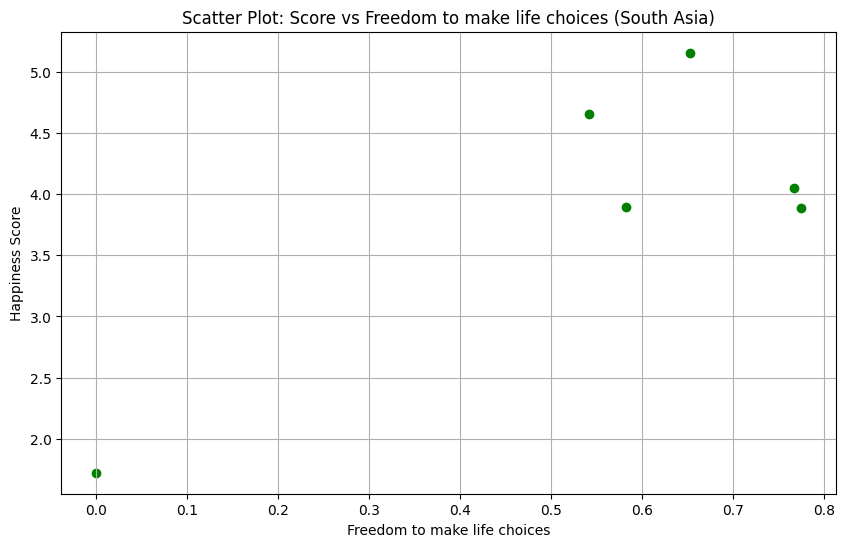

In [102]:
# scatter plot for South Asia (Score vs Freedom to make life choices)
plt.figure(figsize=(10, 6))
plt.scatter(df2['Freedom to make life choices'], df2['score'], color='green')

#labeling the plot
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot: Score vs Freedom to make life choices (South Asia)')

#displaying the plot
plt.grid()
plt.show()

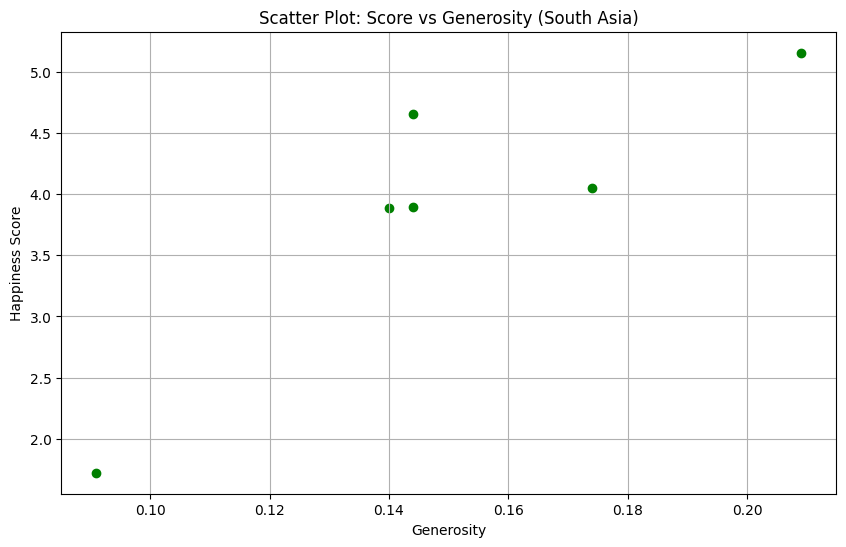

In [103]:
#scatter plot for South Asia (Score vs Generosity)
plt.figure(figsize=(10, 6))
plt.scatter(df2['Generosity'], df2['score'], color='green')

#labeling the plot
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot: Score vs Generosity (South Asia)')

#displaying the plot
plt.grid()
plt.show()

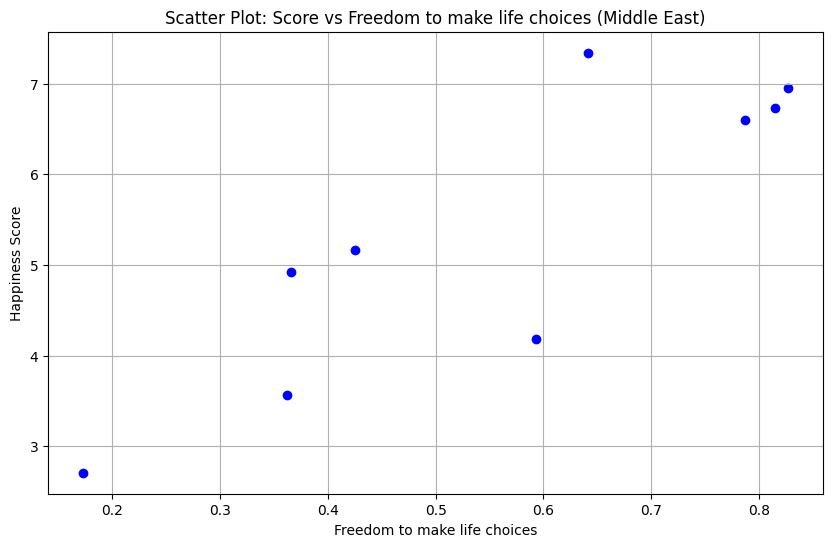

In [104]:
# scatter plot for Middle East (Score vs Freedom to make life choices)
plt.figure(figsize=(10, 6))
plt.scatter(df3['Freedom to make life choices'], df3['score'], color='blue')

#labeling the plot
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot: Score vs Freedom to make life choices (Middle East)')

#displaying the plot
plt.grid()
plt.show()

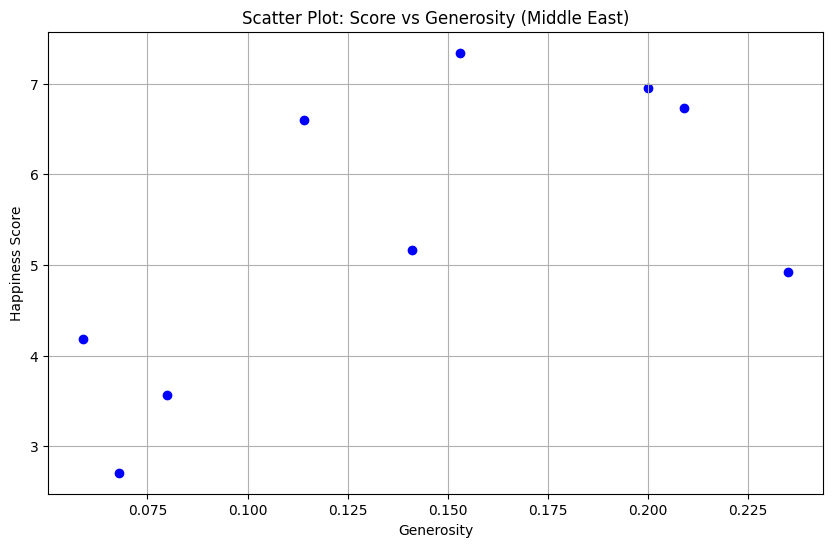

In [105]:
# scatter plot for Middle East (Score vs Generosity)
plt.figure(figsize=(10, 6))
plt.scatter(df3['Generosity'], df3['score'], color='blue')

#labeling the plot
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot: Score vs Generosity (Middle East)')

#displaying the plot
plt.grid()
plt.show()

6. Outlier Detection:
  
  • Identify outlier countries in both regions based on Score and GDP per Capita.

In [106]:
# using the function deined at Problem 2 (Task 3) to find the outliers for South Asia

score_outliers_sa = detect_outliers(df2,'score')
gdp_outliers_sa = detect_outliers(df2,'Log GDP per capita')

#Displaying the outliers
print('Score Outlier (South Asia)',score_outliers_sa[['Country name','score']])
print('\nGDP per capita Outlier (South Asia)',gdp_outliers_sa[['Country name','Log GDP per capita']])

Score Outlier (South Asia)   Country name  score
5  Afghanistan  1.721

GDP per capita Outlier (South Asia)   Country name  Log GDP per capita
5  Afghanistan               0.628


In [107]:
# using the same function to find the outliers for Middle East
score_outliers_me = detect_outliers(df3,'score')
gdp_outliers_me = detect_outliers(df3,'Log GDP per capita')

#Displaying the outliers
print('\nScore Outlier (Middle East)',score_outliers_me[['Country name','score']])
print('\nGDP per capita Outlier (Middle East)',gdp_outliers_me[['Country name','Log GDP per capita']])

#Since the dataFrame is empty there are no Outlier data in middle east based on Score and GDP per capita


Score Outlier (Middle East) Empty DataFrame
Columns: [Country name, score]
Index: []

GDP per capita Outlier (Middle East) Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


• Plot these outliers and discuss their implications.

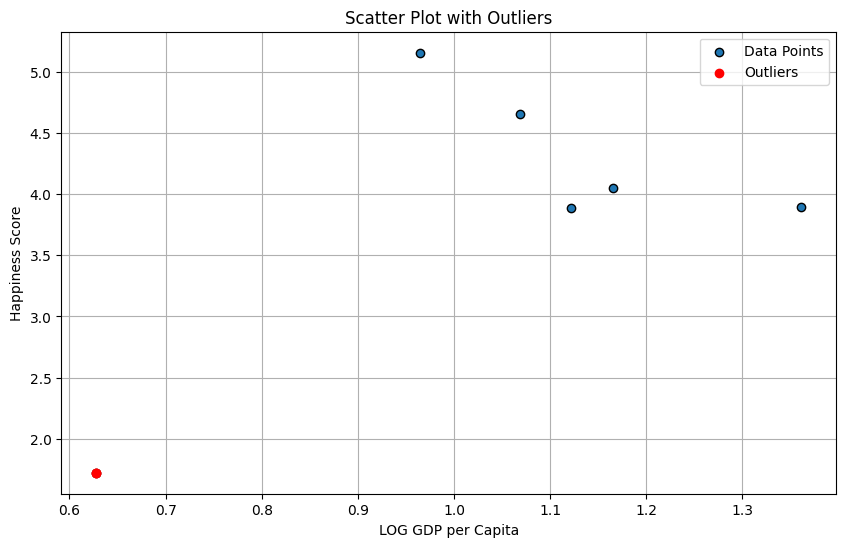

In [108]:
# Since outliers for both Score and GDP per capita is the same dropping the duplicate

outliers_sa = pd.concat([score_outliers_sa,gdp_outliers_sa])
outliers_sa.drop_duplicates()

#creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['Log GDP per capita'], df2['score'], edgecolor='black', label='Data Points')
plt.scatter(outliers_sa['Log GDP per capita'], outliers_sa['score'], color='red', label='Outliers')

# adding labels and titles to the plot

plt.xlabel('LOG GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot with Outliers')
plt.legend()

#displaying the plot
plt.grid()
plt.show()

7. Visualization:

  • Create boxplots comparing the distribution of Score between South Asia and the Middle East.

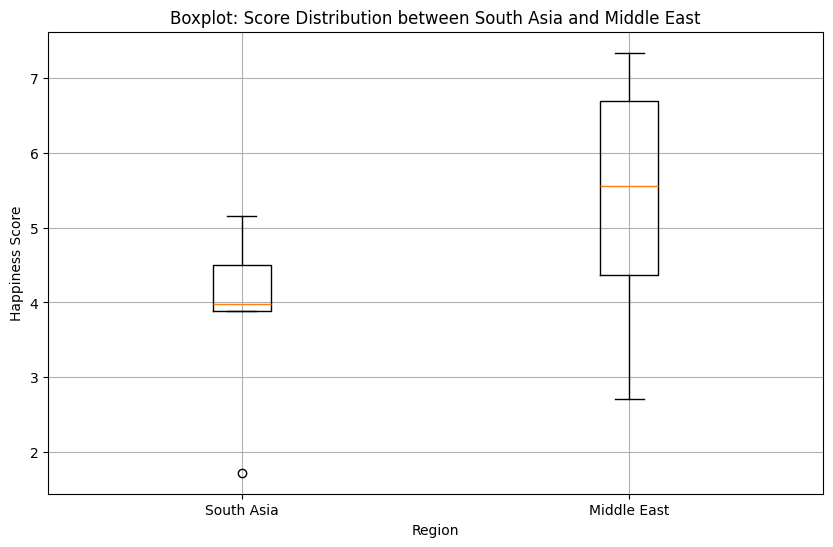

In [109]:
# box plotting to compare the distribution of score between south asia and middle east

plt.figure(figsize=(10, 6))
plt.boxplot([df2['score'], df3['score']], labels=['South Asia', 'Middle East'])

#labeling the plot
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.title('Boxplot: Score Distribution between South Asia and Middle East')

#displaying the plot
plt.grid()
plt.show()

• Interpret the key differences in distribution shapes, medians, and outliers.

  - From the above shown box plot we can see that the score distrubition in south asia is more closely concentrated close to the IQR (4 to 5) where as its more spread in middle east from the IQR (4 to 7).

  - The meadian of South asia is comparatively lower than Middle East.
  
  - There are no outliers in the middle east data where as there is one outlier in South Asia below the happiness score of 2